In [11]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from mpl_toolkits import mplot3d

In [12]:
df = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\Sweden_dataframe_2016.csv')

In [13]:
df.head()

,CET_TimeStamp,Actual_Total_Load,Day_Ahead_Price,Wind_Onshore_Gen_Actual,Wind_Onshore_generation_forecast,Residual_load
0,01.01.2016 01:00,2707.0,16.39,206.0,257.0,2501.0
1,01.01.2016 02:00,2624.0,16.04,185.0,241.0,2439.0
2,01.01.2016 03:00,2543.0,15.74,175.0,222.0,2368.0
3,01.01.2016 04:00,2480.0,15.57,171.0,201.0,2309.0
4,01.01.2016 05:00,2467.0,15.47,158.0,184.0,2309.0


In [14]:
# new data frame with split dates column
new_df = df["CET_TimeStamp"].str.split(" ", n=1, expand=True)

In [15]:
df["Date"]= new_df[0]
df["Hour"] = new_df[1]

In [16]:
df.head()

,CET_TimeStamp,Actual_Total_Load,Day_Ahead_Price,Wind_Onshore_Gen_Actual,Wind_Onshore_generation_forecast,Residual_load,Date,Hour
0,01.01.2016 01:00,2707.0,16.39,206.0,257.0,2501.0,01.01.2016,01:00
1,01.01.2016 02:00,2624.0,16.04,185.0,241.0,2439.0,01.01.2016,02:00
2,01.01.2016 03:00,2543.0,15.74,175.0,222.0,2368.0,01.01.2016,03:00
3,01.01.2016 04:00,2480.0,15.57,171.0,201.0,2309.0,01.01.2016,04:00
4,01.01.2016 05:00,2467.0,15.47,158.0,184.0,2309.0,01.01.2016,05:00


In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 8 columns):
CET_TimeStamp                       8785 non-null object
Actual_Total_Load                   8785 non-null float64
Day_Ahead_Price                     8785 non-null float64
Wind_Onshore_Gen_Actual             8785 non-null float64
Wind_Onshore_generation_forecast    8785 non-null float64
Residual_load                       8785 non-null float64
Date                                8785 non-null datetime64[ns]
Hour                                8785 non-null object
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 549.1+ KB


In [19]:
# create variables for month
df['month'] = df['Date'].dt.month_name()
df

,CET_TimeStamp,Actual_Total_Load,Day_Ahead_Price,Wind_Onshore_Gen_Actual,Wind_Onshore_generation_forecast,Residual_load,Date,Hour,month
0,01.01.2016 01:00,2707.0,16.39,206.0,257.0,2501.0,2016-01-01,01:00,January
1,01.01.2016 02:00,2624.0,16.04,185.0,241.0,2439.0,2016-01-01,02:00,January
2,01.01.2016 03:00,2543.0,15.74,175.0,222.0,2368.0,2016-01-01,03:00,January
3,01.01.2016 04:00,2480.0,15.57,171.0,201.0,2309.0,2016-01-01,04:00,January
4,01.01.2016 05:00,2467.0,15.47,158.0,184.0,2309.0,2016-01-01,05:00,January
5,01.01.2016 06:00,2517.0,15.75,124.0,172.0,2393.0,2016-01-01,06:00,January
6,01.01.2016 07:00,2605.0,15.36,95.0,160.0,2510.0,2016-01-01,07:00,January
7,01.01.2016 08:00,2636.0,15.37,99.0,149.0,2537.0,2016-01-01,08:00,January
8,01.01.2016 09:00,2646.0,15.19,136.0,141.0,2510.0,2016-01-01,09:00,January
9,01.01.2016 10:00,2657.0,15.39,161.0,138.0,2496.0,2016-01-01,10:00,January


In [41]:
# df_prime.to_csv('Heatmap_dataframe.csv')

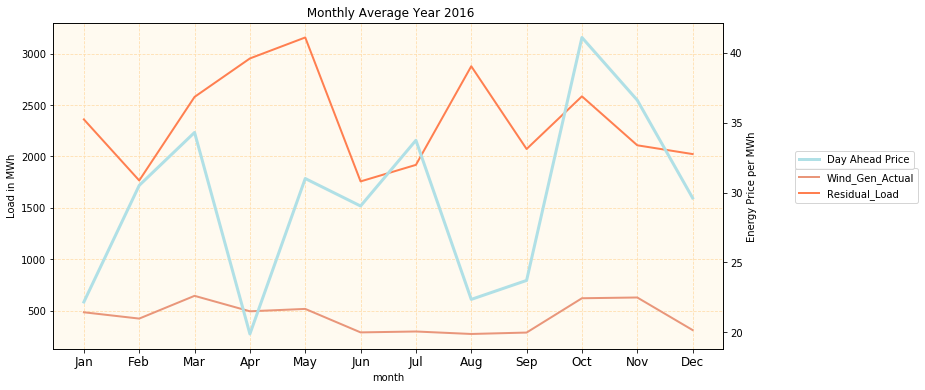

In [20]:
# Set the width and height of the figure
plt.figure(figsize=(12,6))

# Add title
plt.title(" Monthly Average Year 2016")

Price =  df.groupby('month')['Day_Ahead_Price'].agg(np.mean)


Wind_Generation = df.groupby('month')['Wind_Onshore_Gen_Actual'].agg(np.mean)
ax = sns.lineplot(x=Wind_Generation.index, y=Wind_Generation.values, color="darksalmon", linewidth=2, label='Wind_Gen_Actual')
Residual_load = df.groupby('month')['Residual_load'].agg(np.mean)
ax = sns.lineplot(x=Residual_load.index, y=Residual_load.values, color="coral", linewidth=2, label='Residual_Load')
plt.xticks(np.arange(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0, fontsize=12)
plt.ylabel('Load in MWh')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax.set_facecolor('floralwhite')
plt.grid(color = 'navajowhite',linestyle='--')


ax2 = ax.twinx()
sns.lineplot(x=Price.index, y=Price.values, color="powderblue", linewidth=3, label='Day Ahead Price')
plt.xticks(np.arange(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0, fontsize=12)
plt.ylabel('Energy Price per MWh')
# Put a legend to the right of the current axis
ax2.legend(loc='center left', bbox_to_anchor=(1.1, 0.58))


In [3]:
df1 = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\heatmap2016_month_Price.csv')
df2 = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\heatmap2016_month_Load.csv')
df_residual = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\heatmap2016_month_residual_load.csv')
df_wind_act = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\heatmap2016_month_wind_actual.csv')
df_wind_for = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\heatmap2016_month_wind_forecast.csv')

In [4]:
df2.head()

,Hour,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0:00,NaN,2875.0,3316.0,2666.0,2502.0,2181.0,2022.0,1780.0,1962.0,2003,2463.0,3009.0
1,1:00,2707.0,2858.0,3126.0,2674.0,2307.0,2020.0,1870.0,1619.0,1862.0,1925,2275.0,2828.0
2,2:00,2624.0,2827.0,3106.0,2619.0,2196.0,1941.0,1750.0,1510.0,1799.0,1854,2178.0,2789.0
3,3:00,2543.0,2810.0,3097.0,2587.0,2147.0,1922.0,1727.0,1456.0,1818.0,1817,2122.0,2821.0
4,4:00,2480.0,2842.0,3087.0,2616.0,2171.0,1898.0,1695.0,1495.0,1838.0,1810,2132.0,2796.0


In [6]:
df1 = df1.set_index('Hour')
df2 = df2.set_index('Hour')
df_residual = df_residual.set_index('Hour')
df_wind_act = df_wind_act.set_index('Hour')
df_wind_for = df_wind_for.set_index('Hour')

In [8]:
Price1 =  df1.groupby('Hour').agg(np.mean)
Load = df2.groupby('Hour').agg(np.mean)
res_load = df_residual.groupby('Hour').agg(np.mean)
wind_act = df_wind_act.groupby('Hour').agg(np.mean)
wind_for = df_wind_for.groupby('Hour').agg(np.mean)

In [9]:
time = []
for i in range(24):
    if i < 10:
        time.append("0"+str(i)+":00")
    elif i >= 10:
        time.append(str(i)+":00")

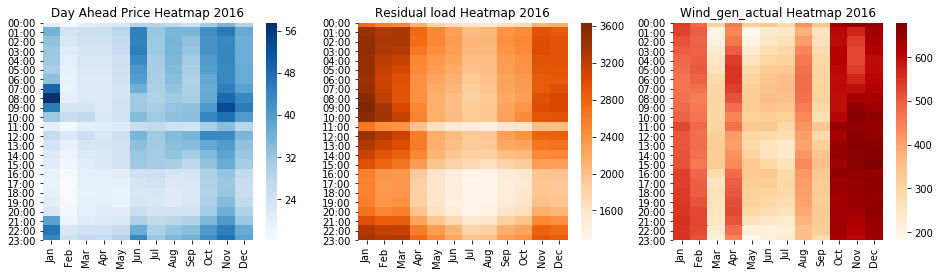

In [16]:
f, axes = plt.subplots(ncols=3, figsize=(16,4))

sns.heatmap(data=Price1, cmap="Blues", yticklabels = time, ax=axes[0])
axes[0].set_title('Day Ahead Price Heatmap 2016')

sns.heatmap(data=res_load, cmap="Oranges", yticklabels = time, ax=axes[1])
axes[1].set_title('Residual load Heatmap 2016')

sns.heatmap(data=wind_act, cmap="OrRd", yticklabels = time, ax=axes[2])
axes[2].set_title('Wind_gen_actual Heatmap 2016')


# Remove ylabel.
axes[0].set_ylabel('') 
axes[1].set_ylabel('') 
axes[2].set_ylabel('') 

plt.show()

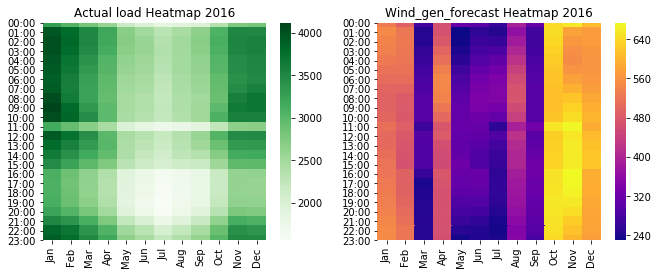

In [52]:
f, axes = plt.subplots(ncols=2, figsize=(11,4))

sns.heatmap(data=Load,cmap="Greens", yticklabels = time, ax=axes[0])
axes[0].set_title('Actual load Heatmap 2016')


sns.heatmap(data=wind_for,cmap="plasma", yticklabels = time, ax=axes[1])
axes[1].set_title('Wind_gen_forecast Heatmap 2016')


# Remove ylabel.
axes[0].set_ylabel('') 
axes[1].set_ylabel('')

plt.show()

In [53]:
df3 = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\Sweden_dataframe_2016.csv')

In [37]:
df3.head()

,CET_TimeStamp,Actual_Total_Load,Day_Ahead_Price,Wind_Onshore_Gen_Actual,Wind_Onshore_generation_forecast,Residual_load
0,01.01.2016 01:00,2707.0,16.39,206.0,257.0,2501.0
1,01.01.2016 02:00,2624.0,16.04,185.0,241.0,2439.0
2,01.01.2016 03:00,2543.0,15.74,175.0,222.0,2368.0
3,01.01.2016 04:00,2480.0,15.57,171.0,201.0,2309.0
4,01.01.2016 05:00,2467.0,15.47,158.0,184.0,2309.0


In [38]:
df3 = df3.drop(columns=['CET_TimeStamp'])

In [39]:
df3.head()

,Actual_Total_Load,Day_Ahead_Price,Wind_Onshore_Gen_Actual,Wind_Onshore_generation_forecast,Residual_load
0,2707.0,16.39,206.0,257.0,2501.0
1,2624.0,16.04,185.0,241.0,2439.0
2,2543.0,15.74,175.0,222.0,2368.0
3,2480.0,15.57,171.0,201.0,2309.0
4,2467.0,15.47,158.0,184.0,2309.0


In [7]:
df5 = df.copy()

In [8]:
df5.head()

,CET_TimeStamp,Actual_Total_Load,Day_Ahead_Price,Wind_Onshore_Gen_Actual,Wind_Onshore_generation_forecast,Residual_load,Date,Hour
0,01.01.2016 01:00,2707.0,16.39,206.0,257.0,2501.0,01.01.2016,01:00
1,01.01.2016 02:00,2624.0,16.04,185.0,241.0,2439.0,01.01.2016,02:00
2,01.01.2016 03:00,2543.0,15.74,175.0,222.0,2368.0,01.01.2016,03:00
3,01.01.2016 04:00,2480.0,15.57,171.0,201.0,2309.0,01.01.2016,04:00
4,01.01.2016 05:00,2467.0,15.47,158.0,184.0,2309.0,01.01.2016,05:00


In [80]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 9 columns):
CET_TimeStamp                       8785 non-null object
Actual_Total_Load                   8785 non-null float64
Day_Ahead_Price                     8785 non-null float64
Wind_Onshore_Gen_Actual             8785 non-null float64
Wind_Onshore_generation_forecast    8785 non-null float64
Residual_load                       8785 non-null float64
Date                                8785 non-null datetime64[ns]
Hour                                8785 non-null object
month                               8785 non-null object
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 617.8+ KB


In [9]:
# new data frame with split dates column
new_df1 = df5["Hour"].str.split(":", n=1, expand=True)

In [10]:
df5["Hour_number"]= new_df1[0]
df5["Hour_rest"] = new_df1[1]

In [11]:
df5.head()

,CET_TimeStamp,Actual_Total_Load,Day_Ahead_Price,Wind_Onshore_Gen_Actual,Wind_Onshore_generation_forecast,Residual_load,Date,Hour,Hour_number,Hour_rest
0,01.01.2016 01:00,2707.0,16.39,206.0,257.0,2501.0,01.01.2016,01:00,01,00
1,01.01.2016 02:00,2624.0,16.04,185.0,241.0,2439.0,01.01.2016,02:00,02,00
2,01.01.2016 03:00,2543.0,15.74,175.0,222.0,2368.0,01.01.2016,03:00,03,00
3,01.01.2016 04:00,2480.0,15.57,171.0,201.0,2309.0,01.01.2016,04:00,04,00
4,01.01.2016 05:00,2467.0,15.47,158.0,184.0,2309.0,01.01.2016,05:00,05,00


In [99]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 11 columns):
CET_TimeStamp                       8785 non-null object
Actual_Total_Load                   8785 non-null float64
Day_Ahead_Price                     8785 non-null float64
Wind_Onshore_Gen_Actual             8785 non-null float64
Wind_Onshore_generation_forecast    8785 non-null float64
Residual_load                       8785 non-null float64
Date                                8785 non-null datetime64[ns]
Hour                                8785 non-null object
month                               8785 non-null object
Hour_number                         8785 non-null object
Hour_rest                           8785 non-null object
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 755.0+ KB


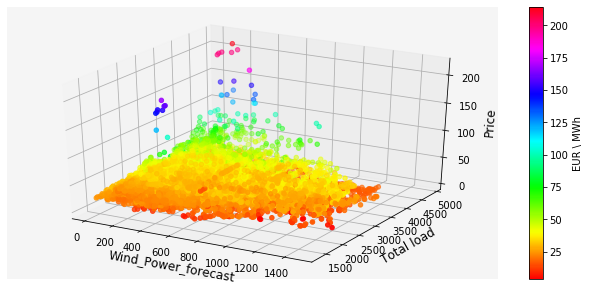

In [20]:
hours = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
fig2 = plt.figure(figsize=(11,5))
ax5 = plt.axes(projection="3d")


Price = df5['Day_Ahead_Price']
wind_actual = df5['Wind_Onshore_Gen_Actual']
wind = df5['Wind_Onshore_generation_forecast']
load = df5['Residual_load']
hour = df5['Hour_number']
tot_load = df5['Actual_Total_Load']
my_scatter_plot = ax5.scatter3D(wind, tot_load, Price, c=Price, cmap='hsv');


cbar = fig2.colorbar(my_scatter_plot)
cbar.set_label('EUR \ MWh')
ax5.set_xlabel('Wind_Power_forecast', color='k', fontsize=12)
ax5.set_ylabel('Total load', color='k',fontsize=12)
ax5.set_zlabel('Price', color='k', fontsize=12)

ax5.set_facecolor('whitesmoke')

#plt.title('Price VS wind_forecast and Total load')

#plt.savefig('2016_3Dmap.png', dpi=100)
#plt.show()
plt.show()